# Machine Learning Foundation

## Section 1, Part c: EDA Lab

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `iris_data.csv` found in the [data](data/) directory.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [24]:
filepath = "./data/iris_data.csv"
df = pd.read_csv(filepath)
print(df.shape)
print(df.columns)
print(df.dtypes)

(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [4]:
df.species.values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [5]:
df.species = df.species.apply(lambda x: x[5:])
df.species

0         a
1         a
2         a
3         a
4         a
       ... 
145    nica
146    nica
147    nica
148    nica
149    nica
Name: species, Length: 150, dtype: object

## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Number of species 

In [7]:
df.species.value_counts()

# df.groupby("species").count()

a        50
color    50
nica     50
Name: species, dtype: int64

In [8]:
print("=============mean: \n",df.mean())
print("=============median: \n",df.quantile())
print("=============max - min : \n", df.max(),'\n',df.min())
print(df.describe())

=============mean: 
 sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64
=============median: 
 sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
Name: 0.5, dtype: float64
=============max - min : 
 sepal_length     7.9
sepal_width      4.4
petal_length     6.9
petal_width      2.5
species         nica
dtype: object 
 sepal_length    4.3
sepal_width     2.0
petal_length    1.0
petal_width     0.1
species           a
dtype: object
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000   

C:\Users\Antonio\AppData\Local\Temp/ipykernel_14976/3685715446.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("=============mean: \n",df.mean())


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [9]:
df.groupby('species').agg(['mean','median','min','max'])

sepal_length                  sepal_width                   \
                mean median  min  max        mean median  min  max   
species                                                              
a              5.006    5.0  4.3  5.8       3.418    3.4  2.3  4.4   
color          5.936    5.9  4.9  7.0       2.770    2.8  2.0  3.4   
nica           6.588    6.5  4.9  7.9       2.974    3.0  2.2  3.8   

        petal_length                  petal_width                   
                mean median  min  max        mean median  min  max  
species                                                             
a              1.464   1.50  1.0  1.9       0.244    0.2  0.1  0.6  
color          4.260   4.35  3.0  5.1       1.326    1.3  1.0  1.8  
nica           5.552   5.55  4.5  6.9       2.026    2.0  1.4  2.5

In [10]:
print('mean for each species')
print(df.groupby('species').mean())
print('\nmedian for each species')
print(df.groupby('species').median())

mean for each species
         sepal_length  sepal_width  petal_length  petal_width
species                                                      
a               5.006        3.418         1.464        0.244
color           5.936        2.770         4.260        1.326
nica            6.588        2.974         5.552        2.026

median for each species
         sepal_length  sepal_width  petal_length  petal_width
species                                                      
a                 5.0          3.4          1.50          0.2
color             5.9          2.8          4.35          1.3
nica              6.5          3.0          5.55          2.0


## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

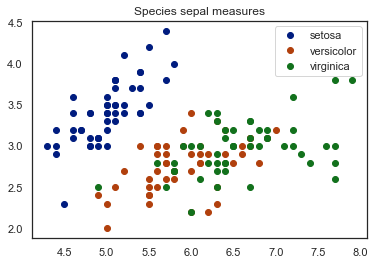

In [25]:
fig, ax = plt.subplots()
split = df.species=='setosa'
ax.plot(df.loc[split].sepal_length, df.loc[split].sepal_width, ls='', marker='o', label="setosa")
split = df.species=='versicolor'
ax.plot(df.loc[split].sepal_length, df.loc[split].sepal_width, ls='', marker='o', label="versicolor")
split = df.species=='virginica'
_ = ax.plot(df.loc[split].sepal_length, df.loc[split].sepal_width, ls='', marker='o', label="virginica")
_ = ax.set(title="Species sepal measures")
_ = ax.legend()

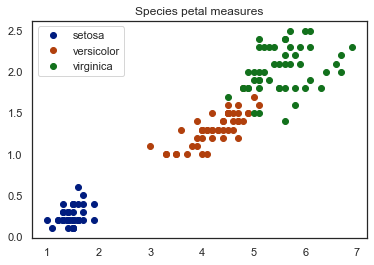

In [26]:
fig, ax = plt.subplots()
split = df.species=='setosa'
ax.plot(df.loc[split].petal_length, df.loc[split].petal_width, ls='', marker='o', label="setosa")
split = df.species=='versicolor'
ax.plot(df.loc[split].petal_length, df.loc[split].petal_width, ls='', marker='o', label="versicolor")
split = df.species=='virginica'
_ = ax.plot(df.loc[split].petal_length, df.loc[split].petal_width, ls='', marker='o', label="virginica")
_ = ax.set(title="Species petal measures")
_ = ax.legend()

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

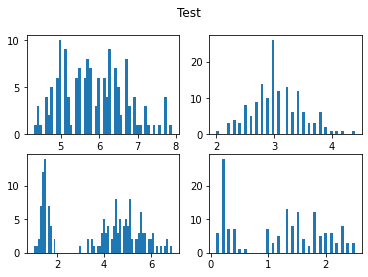

In [13]:
fig, ax = plt.subplots(2,2)
_ = ax[0][0].hist(df.sepal_length, label = 'sl',bins=50)
_ = ax[0][1].hist(df.sepal_width,  label = 'sw',bins=50)
_ = ax[1][0].hist(df.petal_length, label = 'pl',bins=70)
_ = ax[1][1].hist(df.petal_width,  label = 'pw',bins=50)
_ = fig.suptitle("Test")

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

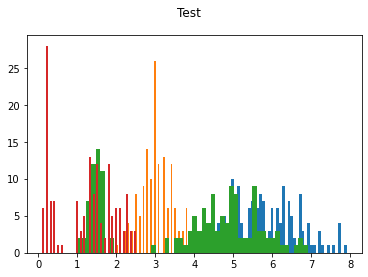

In [14]:
fig, ax = plt.subplots()
_ = ax.hist(df.sepal_length, label = 'sl',bins=50)
_ = ax.hist(df.sepal_width,  label = 'sw',bins=50)
_ = ax.hist(df.petal_length, label = 'pl',bins=50)
_ = ax.hist(df.petal_width,  label = 'pw',bins=50)
_ = fig.suptitle("Test")

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

In [15]:
import seaborn as sns
sns.set() 

<AxesSubplot:>

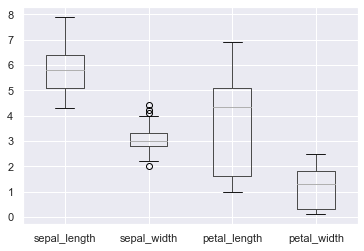

In [16]:
df.boxplot()

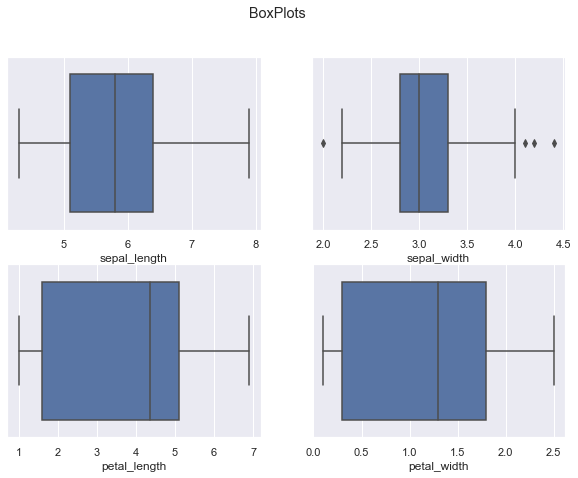

In [17]:
fig, ax = plt.subplots(2,2, figsize=(10,7))
fig.suptitle("BoxPlots")

sns.boxplot(ax=ax[0][0], x=df.sepal_length)
sns.boxplot(ax=ax[0][1], x=df.sepal_width)
sns.boxplot(ax=ax[1][0], x=df.petal_length)
_ = sns.boxplot(ax=ax[1][1], x=df.petal_width)

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [18]:
### BEGIN SOLUTION
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data = (df
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()
### END SOLUTION

,species,measurement,size
0,a,sepal_length,5.1
1,a,sepal_width,3.5
2,a,petal_length,1.4
3,a,petal_width,0.2
4,a,sepal_length,4.9


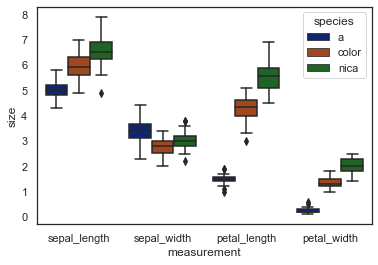

In [19]:
### BEGIN SOLUTION
# Now plot the dataframe from above using Seaborn

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);
### END SOLUTION

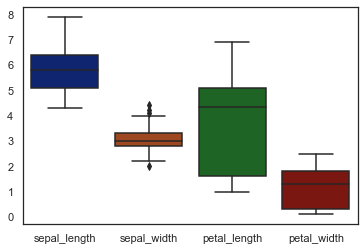

In [20]:
ax = sns.boxplot(data=df)
# ax = sns.swarmplot(data=df, color=".25", hue='species')

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

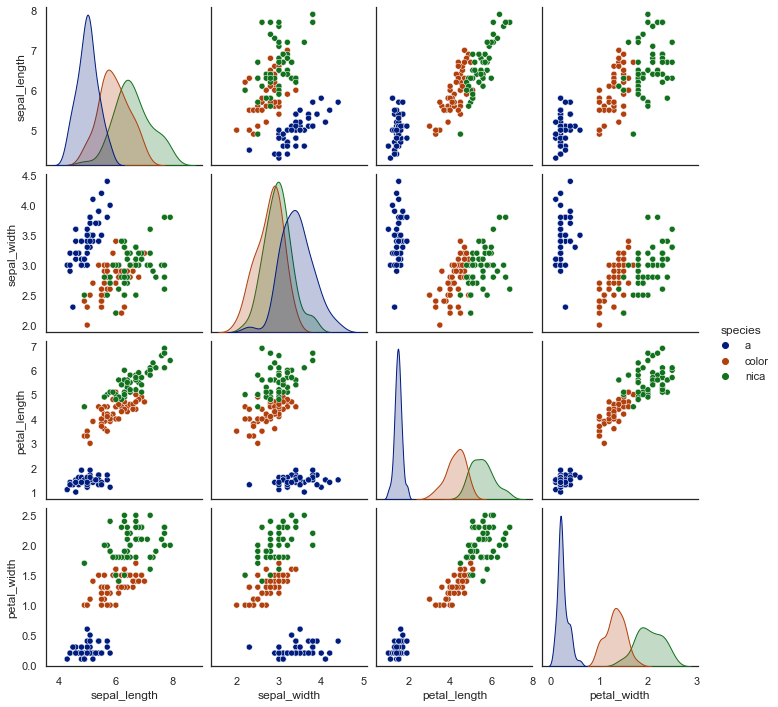

In [21]:
_ = sns.pairplot(data=df, hue='species')

---
### Machine Learning Foundation (C) 2020 IBM Corporation